In [1]:
#pip install --upgrade --force-reinstall matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import json
import re

In [4]:
import matplotlib as plt

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Učitavanje podataka

In [6]:
data_attrition=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [7]:
data_attrition

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

#### Proveravanje null vrednosti u skupu podataka

In [7]:
data_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
##### Proveravamo da li nam se u skupu podataka 
maska = data_attrition.isnull() | (data_attrition == '') | (data_attrition == 'None') | (data_attrition == ' ')

In [9]:
broj_null_vrednosti = maska.sum()
print(broj_null_vrednosti)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
### Provera duplikata je takodje jedna od tehnika koje su neophodne u generisanju i preprocesiranju modela mašinskog učenja
## Nekada se radi svesno oversemplovanje ili undersamplovanje skupa podataka za treniranje medjutim u ovom slučaju je
# bolje na početku proveriti i uveriti se da li u samom startu postoje vrednosti koje su duplirane
### 

In [11]:
podaci_duplirani= data_attrition.duplicated()

In [12]:
# SADA DA VIDIMO DA LI SU PODACI DUPLIRANI
data_attrition[podaci_duplirani]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [13]:
#-Podaci u početnom skupu podataka nisu duplirani i nalaze se normalno 

In [14]:
#### Provera unique vrednosti unutar kolona 
#### kako bi izbegle i izbrisale konstantne vrednosti u skupu podataka koje nisu korisne ili su neke informacije
### poput ID kolona koji nisu kasnije relevantne za analizu

In [15]:
data_attrition.shape

(1470, 35)

In [16]:
for kolona in data_attrition.columns:
    print(f"{kolona}: Ima jedinstvenih vrednosti {data_attrition[kolona].nunique()}")
    print("######################################################")

Age: Ima jedinstvenih vrednosti 43
######################################################
Attrition: Ima jedinstvenih vrednosti 2
######################################################
BusinessTravel: Ima jedinstvenih vrednosti 3
######################################################
DailyRate: Ima jedinstvenih vrednosti 886
######################################################
Department: Ima jedinstvenih vrednosti 3
######################################################
DistanceFromHome: Ima jedinstvenih vrednosti 29
######################################################
Education: Ima jedinstvenih vrednosti 5
######################################################
EducationField: Ima jedinstvenih vrednosti 6
######################################################
EmployeeCount: Ima jedinstvenih vrednosti 1
######################################################
EmployeeNumber: Ima jedinstvenih vrednosti 1470
######################################################
EnvironmentSatisfactio

In [17]:
for kolona in data_attrition.columns:
    if data_attrition[kolona].nunique()==1:
        print(f"{kolona}: Ima jednu jedinstvenu vrednosti {data_attrition[kolona].nunique()}")
        print("######################################################")
    elif data_attrition[kolona].nunique()==data_attrition.shape[0]:
        print(f"{kolona}: Ima sve različite vrednosti")
        print("######################################################")
        

EmployeeCount: Ima jednu jedinstvenu vrednosti 1
######################################################
EmployeeNumber: Ima sve različite vrednosti
######################################################
Over18: Ima jednu jedinstvenu vrednosti 1
######################################################
StandardHours: Ima jednu jedinstvenu vrednosti 1
######################################################


In [18]:
## pre nego što ove informacije budu iskorišćene za prečišćavanje skupa podataka možemo videti raspodelu

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

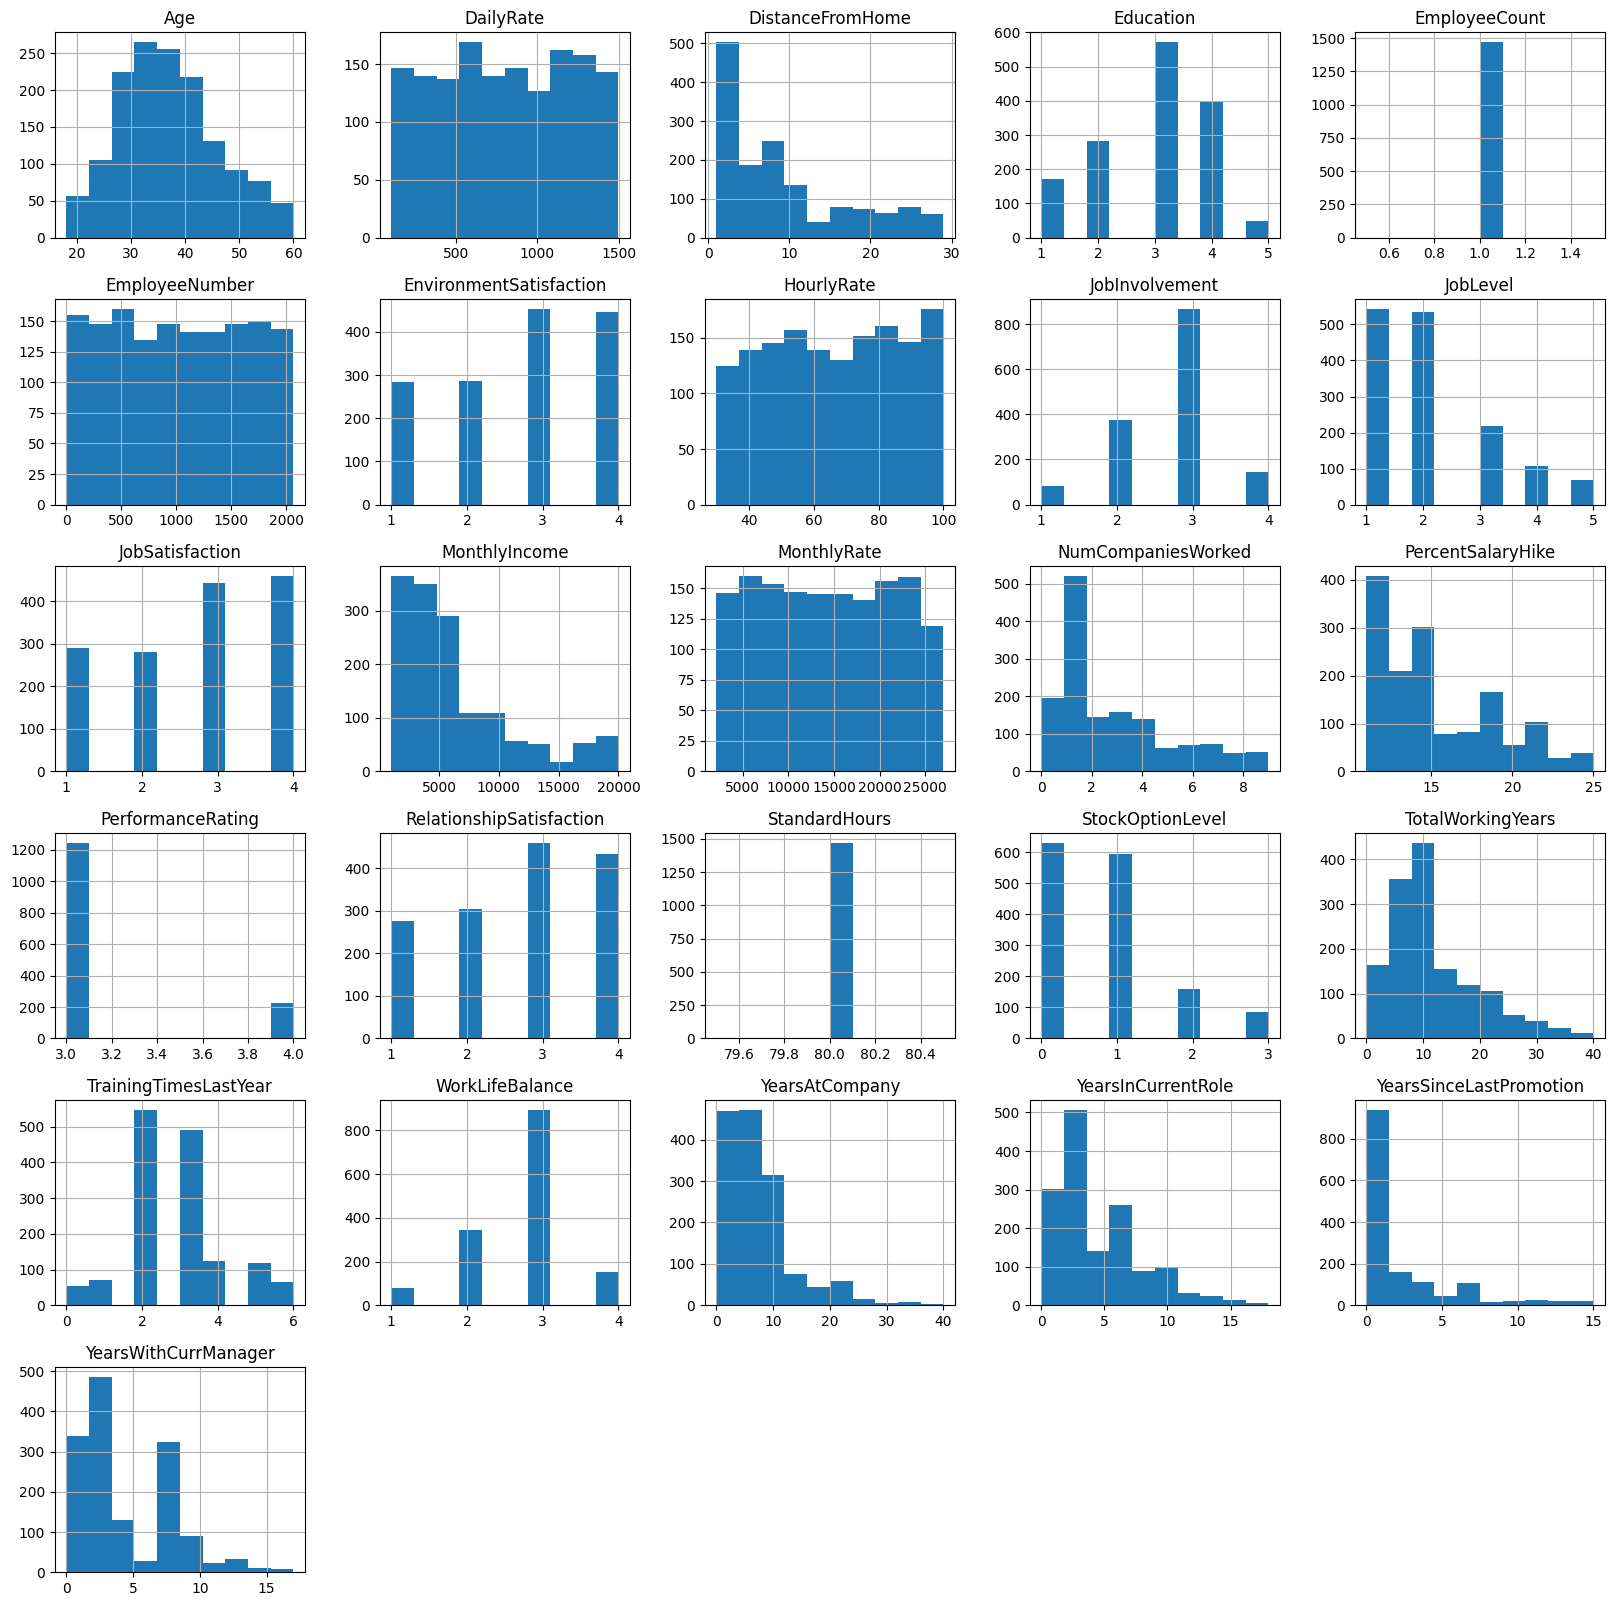

In [19]:
data_attrition.hist(figsize=(20,20))

In [20]:
# Na osnovu prikazanih histograma mogu se izneti sl. zaključci:
# - Dobra većina varijabli imaju distribuciju gde su krajevi raspodele izuzetno opterećeni,
## tako reći to su raspodele verovatnoća čiji repovi (krajevi) nisu eksponencijalno ograničeni. 
# To onda znači da oni opadaju sporije od ekponencijalne raspodele.
# u našem slučaju to bi značilo da većina varijabli ima raspodelu nakrivljenu na desno.
### Takođe vidimo da su neke varijable konstantne i da je moguće da se izbace i ne proučavaju dalje.

In [21]:
##### Ovde se zakljucuje da je neophodno ukoliti kolone koje imaju standardnu vrednost poput EmployeeCount, StandardHours Over18 a da
#varijabla EmployeeNumber predstavlja 

In [22]:
data_attrition.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True                      )

In [23]:
data_attrition.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [24]:
### yes - 1; no -0
# label_encoder_output = LabelEncoder()
# data_attrition['Attrition'] = label_encoder_output.fit_transform(data_attrition['Attrition'])

In [25]:
data_attrition['Attrition'] = data_attrition['Attrition'].map({'Yes': 1, 'No': 0})


In [26]:
data_attrition.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [27]:
#data_attrition.head(5).to_csv("sample21.07.csv", index=False)

In [28]:
## sledeći korak je da se odradi uklanjanje outlier-a 
# - tu mogu da se koriste dve technike sada ćemo odraditi tehniku koriščenjem Z-score-a ali posto je takav vid uklanjanja oulier-a
## preporucljiv iskljucivo sa numerickim vrednostima potrebno je da se dobro razumeju sve kolone i shodno tome da se razdvoje
#### u odgovarajuće tipove podatka

In [29]:
data_attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
numeričke_varijable=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                    'YearsSinceLastPromotion']

In [31]:
kategoričke_nominalne=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [32]:
izlazna_varijabla=['Attrition']

In [33]:
kategoričke_binarne=['Gender', 'OverTime']

In [34]:
kategoričke_ordinalne=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                       'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction',
                       'StockOptionLevel', 'WorkLifeBalance']

In [35]:
sve_kategoricke = kategoričke_binarne+kategoričke_nominalne+kategoričke_ordinalne

In [38]:
len(sve_kategoricke)

16

In [39]:
sve_kategoricke

['Gender',
 'OverTime',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [44]:
############## ZA KATEGORICKE VARIJABLE JE POTREBNO DA SE URADI TEST ZAVISNOSTI SA IZLAZNOM VARIJABLOM 
## KAKO BI SE NEKI DEO VARIJABLI MOGAO ISKLJUCITI IZ PROCESA IZGRADNJE MODELA i za to je najbolji 
### hi-kvadrat test nezavisnosti

In [43]:
sve_kategoricke

['Gender',
 'OverTime',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [47]:
from scipy.stats import chi2_contingency 

In [68]:
hi_statistike=[]
p_vrednosti=[]
vars_rm=[]

In [69]:
for col in sve_kategoricke:
    observed = pd.crosstab(data_attrition["Attrition"], data_attrition[col])
    chi2, p, dof, expected = chi2_contingency(observed)
    print(f"Za kolonu {col} chi2 je  {chi2} and p value is {p}")
    hi_statistike.append(chi2)
    p_vrednosti.append(p)
    if p >= 0.05:
        print(f"Attrition i {col} su nezavisne (p-value = {p:.2f}).\n")
        vars_rm.append(col)


Za kolonu Gender chi2 je  1.1169671241970975 and p value is 0.29057244902890855
Attrition i Gender su nezavisne (p-value = 0.29).

Za kolonu OverTime chi2 je  87.56429365828768 and p value is 8.158423721538322e-21
Za kolonu BusinessTravel chi2 je  24.182413685655174 and p value is 5.608614476449931e-06
Za kolonu Department chi2 je  10.79600732241067 and p value is 0.004525606574479634
Za kolonu EducationField chi2 je  16.024674119585423 and p value is 0.006773980139025222
Za kolonu JobRole chi2 je  86.19025367670434 and p value is 2.7524816380506567e-15
Za kolonu MaritalStatus chi2 je  46.163676540848705 and p value is 9.455511060340833e-11
Za kolonu Education chi2 je  3.0739613982367193 and p value is 0.5455253376565949
Attrition i Education su nezavisne (p-value = 0.55).

Za kolonu EnvironmentSatisfaction chi2 je  22.503881435842295 and p value is 5.1234689062894205e-05
Za kolonu JobInvolvement chi2 je  28.492021234659283 and p value is 2.8631806367134195e-06
Za kolonu JobLevel chi2 

In [70]:
len(hi_statistike)

16

In [71]:
len(p_vrednosti)

16

In [72]:
len (sve_kategoricke)

16

In [74]:
chi_df = pd.DataFrame({'Varijabla': sve_kategoricke, 'Hi-Statistika': hi_statistike, 'P_vrednost': p_vrednosti})
chi_df = chi_df[chi_df['P_vrednost'] < 0.05].sort_values(by="P_vrednost")

In [75]:
chi_df

Varijabla  Hi-Statistika    P_vrednost
1                  OverTime      87.564294  8.158424e-21
5                   JobRole      86.190254  2.752482e-15
10                 JobLevel      72.529013  6.634685e-15
14         StockOptionLevel      60.598301  4.379390e-13
6             MaritalStatus      46.163677  9.455511e-11
9            JobInvolvement      28.492021  2.863181e-06
2            BusinessTravel      24.182414  5.608614e-06
8   EnvironmentSatisfaction      22.503881  5.123469e-05
11          JobSatisfaction      17.505077  5.563005e-04
15          WorkLifeBalance      16.325097  9.725699e-04
3                Department      10.796007  4.525607e-03
4            EducationField      16.024674  6.773980e-03

In [77]:
#### Ovde se vidi da varijable poput pola, obrazovanja, ratinga performansi i zadovoljstva odnosima 
#3 predstavljaju varijable koje nemaju statisticku znacajnost inpakta na to da li ce zaposleni otici ili ne
## i da su shodno tome nezavisne i da ih je potrebno iskljuciti iz daljih analiza

In [81]:
sve_kategoricke_bez_nezavisnih = [col for col in sve_kategoricke if col not in vars_rm]

In [82]:
sve_kategoricke_bez_nezavisnih

['OverTime',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [83]:
y=data_attrition['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
X=data_attrition.loc[:, data_attrition.columns != 'Attrition']
X.drop(data_attrition[vars_rm], axis=1, inplace=True)
X=pd.get_dummies(X, columns=sve_kategoricke_bez_nezavisnih, drop_first=True)
X.columns=X.columns.str.replace(' ', '')
X.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  MonthlyRate  \
0   41       1102                 1          94           5993        19479   
1   49        279                 8          61           5130        24907   
2   37       1373                 2          92           2090         2396   
3   33       1392                 3          56           2909        23159   
4   27        591                 2          40           3468        16632   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                   8                 11                  8   
1                   1                 23                 10   
2                   6                 15                  7   
3                   1                 11                  8   
4                   9                 12                  6   

   TrainingTimesLastYear  ...  JobLevel_5  JobSatisfaction_2  \
0                      0  ...       False              False   
1                      3  ...       False               True   
2                      3  ...       False              False   
3                      3  ...       False              False   
4                      3  ...       False               True   

   JobSatisfaction_3  JobSatisfaction_4  StockOptionLevel_1  \
0              False               True               False   
1              False              False                True   
2               True              False               False   
3               True              False               False   
4              False              False                True   

   StockOptionLevel_2  StockOptionLevel_3  WorkLifeBalance_2  \
0               False               False              False   
1               False               False              False   
2               False               False              False   
3               False               False              False   
4               False               False              False   

   WorkLifeBalance_3  WorkLifeBalance_4  
0              False              False  
1               True              False  
2               True              False  
3               True              False  
4               True              False  

[5 rows x 53 columns]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1029, 53) (1029,)
Validation set Shape: (220, 53) (220,)
Test set Shape: (221, 53) (221,)


In [87]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [88]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.039281  -1.431033         -0.382060    1.548533      -0.005600   
1 -1.056109   1.632008         -1.000009    0.767530      -0.566258   
2  0.039281   1.493788         -0.505649    0.865156      -0.632218   
3 -0.179797   1.449361         -0.011290   -0.892100      -0.298662   
4  2.339599  -0.500520          1.471788    0.279404       2.368326   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0     1.223427            0.526182          -0.310835          -0.523106   
1     0.525874           -0.678807          -1.130259          -0.783583   
2     1.596613           -1.080469          -0.310835          -0.523106   
3     0.641145           -0.678807           1.054873          -0.132390   
4    -0.337603            0.526182          -0.583976           2.342142   

   TrainingTimesLastYear  ...  JobLevel_5  JobSatisfaction_2  \
0               1.731250  ...   -0.235339          -0.482012   
1              -0.607642  ...   -0.235339           2.074638   
2              -0.607642  ...   -0.235339          -0.482012   
3               1.731250  ...   -0.235339          -0.482012   
4              -0.607642  ...   -0.235339          -0.482012   

   JobSatisfaction_3  JobSatisfaction_4  StockOptionLevel_1  \
0          -0.643010           1.471786            1.196923   
1          -0.643010          -0.679447            1.196923   
2           1.555186          -0.679447           -0.835476   
3           1.555186          -0.679447           -0.835476   
4          -0.643010           1.471786            1.196923   

   StockOptionLevel_2  StockOptionLevel_3  WorkLifeBalance_2  \
0           -0.344207           -0.253211          -0.542531   
1           -0.344207           -0.253211          -0.542531   
2           -0.344207           -0.253211          -0.542531   
3           -0.344207           -0.253211          -0.542531   
4           -0.344207           -0.253211           1.843213   

   WorkLifeBalance_3  WorkLifeBalance_4  
0          -1.261721           2.950855  
1           0.792568          -0.338885  
2          -1.261721          -0.338885  
3           0.792568          -0.338885  
4          -1.261721          -0.338885  

[5 rows x 53 columns]

In [92]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [94]:
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = nan
Best Params: RandomForestClassifier(bootstrap=False, max_depth=14, max_features=None,
                       min_samples_leaf=5, min_samples_split=8,
                       n_estimators=200, random_state=92)


In [42]:
data_attrition.shape

(1470, 31)

In [38]:
###
import numpy as np
from scipy import stats

In [39]:
############### sada zakomentarisano

In [40]:
############### sada zakomentarisano
# z_skorovi = np.abs(stats.zscore(data_attrition[numeričke_varijable]))
# data_attrition_outlier_cleaned = data_attrition[(z_skorovi < 3).all(axis=1)]

In [41]:
data_attrition_outlier_cleaned=data_attrition

In [42]:
data_attrition_outlier_cleaned.shape

(1470, 31)

In [43]:
#### Sledeći korak jeste feature engineering u kome ćemo dodati odredjene izvedene varijable

In [44]:
data_attrition_obogacen= data_attrition_outlier_cleaned.copy()

In [45]:
############### sada zakomentarisano
# data_attrition_obogacen['YearsAtCompany_ManagerRatio'] = data_attrition_obogacen['YearsAtCompany'] / (data_attrition_obogacen['YearsWithCurrManager'] + 1)
# data_attrition_obogacen['SalaryIncreasePerYear']=(data_attrition_obogacen['MonthlyIncome']-data_attrition_obogacen['DailyRate']*22) / data_attrition_obogacen['YearsAtCompany']

In [46]:
data_attrition_obogacen.shape

(1470, 31)

In [47]:
### sada se dodaju ove dve numericke varijable u numericke varijable i onda je potrebno da će biti odradjena 
##odgovarajuća konverzija kategorickih varijabli u numerickih kao i skaliranje numerickih varijabli

In [48]:
############### sada zakomentarisano
# numeričke_varijable.append('YearsAtCompany_ManagerRatio')
# numeričke_varijable.append('SalaryIncreasePerYear')

In [49]:
numeričke_varijable

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsSinceLastPromotion']

In [50]:
##### konverzija kategorickih u numericke

In [51]:
### prvo kategoricke ordinalne konvertujemo u ordinal varijable

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [53]:
label_encoders = {}
for kolona in kategoričke_ordinalne:
    le = LabelEncoder()
    data_attrition_obogacen[kolona] = le.fit_transform(data_attrition_obogacen[kolona])
    label_encoders[kolona] = le

In [54]:
data_attrition_obogacen = pd.get_dummies(data_attrition_obogacen, columns= kategoričke_nominalne + kategoričke_binarne, drop_first=True)

In [55]:
#### Sada se koristi Standard Scaler za skaliranje numerickih varijabli

In [56]:
###3 ! ovo je zbog izvedenih varijabli 
data_attrition_obogacen.replace([np.inf, -np.inf], np.nan, inplace=True)
data_attrition_obogacen.dropna(inplace=True)

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data_attrition_obogacen.shape

(1470, 45)

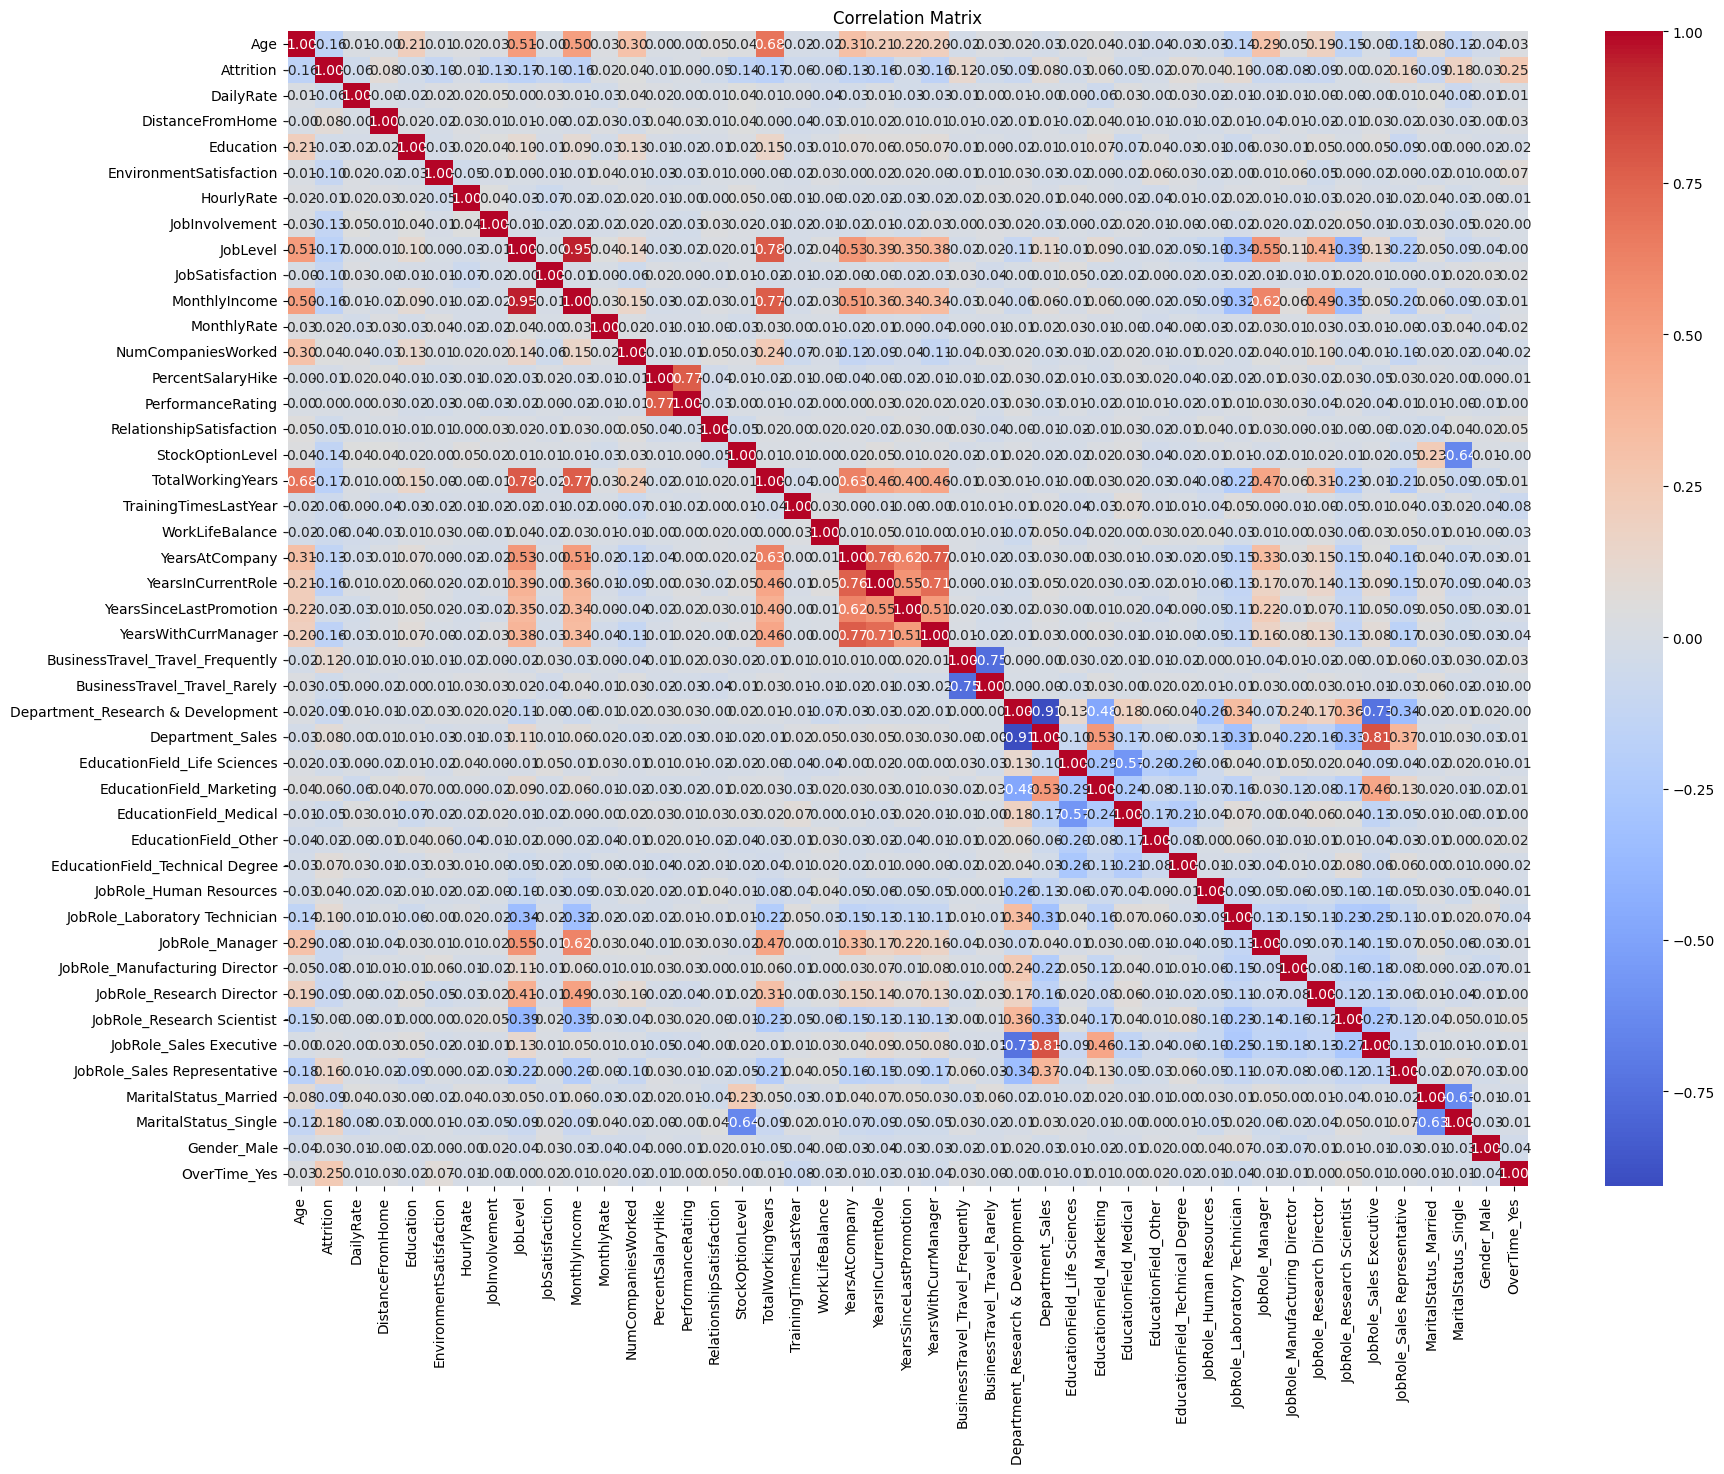

In [59]:
corr_matrix = data_attrition_obogacen.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [60]:
threshold = 0.8
corr_matrix = data_attrition_obogacen.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(f"{to_drop}")
df_reduced = data_attrition_obogacen.drop(columns=to_drop)

['MonthlyIncome', 'Department_Sales', 'JobRole_Sales Executive']


In [61]:
data_pca = df_reduced

In [63]:
data_pca.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Representative', 'M

In [74]:
data_pca['Age'].isnull().sum()

0

In [65]:
numeričke_varijable.remove('MonthlyIncome')

In [71]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [67]:
scaler = StandardScaler()
data_pca[numeričke_varijable] = scaler.fit_transform([numeričke_varijable])

ValueError: could not convert string to float: 'Age'

In [58]:
#### ZAKOMENTARISACEMO U OVOJ VERZIJI KODA
#from sklearn.decomposition import PCA

In [59]:
# pca = PCA(n_components=30)
# data_pca = pca.fit_transform(data_attrition_obogacen.drop(columns=['Attrition']))
# data_pca = pd.DataFrame(data_pca, columns=[f'PC{i}' for i in range(1, 31)])
# data_pca['Attrition'] = data_attrition_obogacen['Attrition'].values

In [60]:
data_pca=data_attrition_obogacen

In [61]:
### podela skupa podataka na treniranje i testiranje

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_ulazi = data_pca.drop(columns=['Attrition'])
y_izlaz = data_pca['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X_ulazi, y_izlaz, test_size=0.2, random_state=42, stratify=y_izlaz)

In [64]:
######### obrizom na ne balansiranost klasa potrebno je uraditi i balansking samih klasa

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smote = SMOTE()
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [67]:
############# TRENIRANJE RAZLICITIH TIPOVA MODELA ZA RESAVANJE MODELA KLASIFIKACIJE ZAPOSLENIH###########

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#pip install lightgbm

In [70]:
#pip install catboost

In [71]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [72]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, precision_recall_curve

In [73]:
#### KAKO BI LAKSE TRENIRALI MODELI I PRATILE PERFORMANSE funkcije za prikazivanje rezultate i treniranje modela ce se deklaristi ranije

In [74]:
def prikaz_metrika(model_name, y_test, y_pred, y_pred_prob):
    print(f"Tip algoritma/modela: {model_name}")
    print("#################################")
    print(f"Accuracy (Tačnost): {accuracy_score(y_test, y_pred)}")
    print("#################################")

    print(f"Precision (Preciznost): {precision_score(y_test, y_pred)}")
    print("#################################")

    print(f"Recall(odziv): {recall_score(y_test, y_pred)}")

    print("###############################")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred_prob)}")
    print(f"Confusion Matrix (matrica konfuzije):\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report (klasifikacijski izvestaj):\n{classification_report(y_test, y_pred)}\n")

    ###### printing the confusion matrix
    plt.figure(figsize=(4, 4))
    matrica_konfuzije= confusion_matrix(y_test, y_pred)
    ## IZMENJENA MATRICA RADI INTUITIVNIJEG PRIKAZA
    konvertovana_matrica = np.fliplr(np.flipud(matrica_konfuzije))
    
    sns.heatmap(konvertovana_matrica, annot=True, fmt='d', cmap='Purples', xticklabels=['Attrition', 'No Attrition'], yticklabels=['Attrition', 'No Attrition'])
    plt.xlabel('Predvidjena')
    plt.ylabel('Stvarna')
    plt.title(f'Matrica konfuzuje za model {model_name}')
    plt.show()
    
    ### Jos jedna od metrika koja je izuzetno bitna je ROC kriva ona predstavlja odnos TPR I FPR
    # TPR - je udeo onih koji su stvarno pozitivni predvidjeni u celom kupu stvarno pozitivnih
    # FPR - je udeo onih koju su netacno predvidjeni ali pozitibna klasa u skupu svih stvarno negativnih
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC (Area Under the Curve) = {roc_auc_score(y_test, y_pred_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Kriva za {model_name}')
    plt.legend()
    plt.show()
    
    ##Prikazivanje precision-recall krive -- ova metrika dosta je bolja kada su neuravnosteženosti 
    #skupova podataka prisutni u pogledu izlazne varijable
    # preciznost - je procenat tacno predvidjenih pozitivnih u ukupnom broju predvidjenih pozitivnih
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label=f' Grafik za model{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall kriva za  {model_name}')
    plt.legend()
    plt.show()

In [75]:
#### prvi model koji cemo istrenirati bez hiperparametrizacije je model logisticke regresija

#### Logisticka regresija - basic

Tip algoritma/modela: Logistic Regression
#################################
Accuracy (Tačnost): 0.8571428571428571
#################################
Precision (Preciznost): 0.5675675675675675
#################################
Recall(odziv): 0.44680851063829785
###############################
F1 Score: 0.5
ROC AUC: 0.8164355241622879
Confusion Matrix (matrica konfuzije):
[[231  16]
 [ 26  21]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       247
           1       0.57      0.45      0.50        47

    accuracy                           0.86       294
   macro avg       0.73      0.69      0.71       294
weighted avg       0.85      0.86      0.85       294




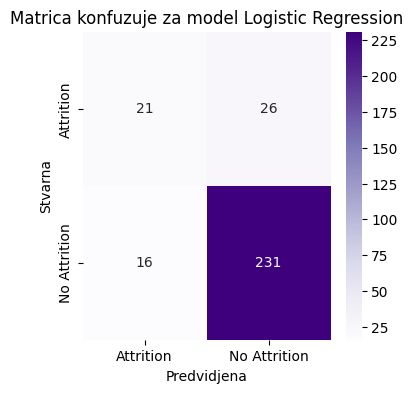

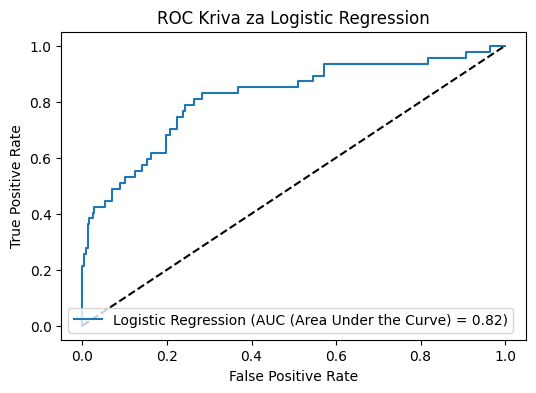

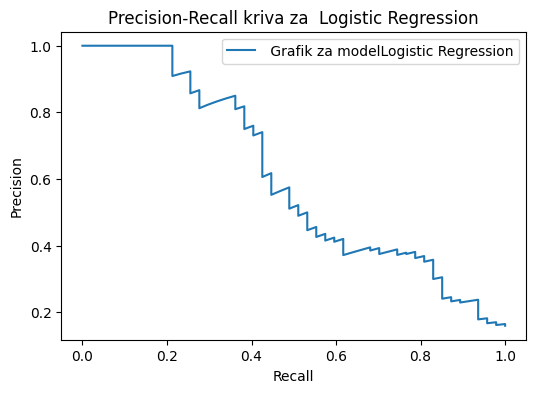

In [76]:
model_lr = LogisticRegression()
model_lr.fit(X_train_bal, y_train_bal)
y_pred_lr = model_lr.predict(X_test)
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]
prikaz_metrika("Logistic Regression", y_test, y_pred_lr, y_pred_prob_lr)

Tip algoritma/modela: DecisionTreeClassifier
#################################
Accuracy (Tačnost): 0.7517006802721088
#################################
Precision (Preciznost): 0.3194444444444444
#################################
Recall(odziv): 0.48936170212765956
###############################
F1 Score: 0.3865546218487395
ROC AUC: 0.64549056766302
Confusion Matrix (matrica konfuzije):
[[198  49]
 [ 24  23]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       247
           1       0.32      0.49      0.39        47

    accuracy                           0.75       294
   macro avg       0.61      0.65      0.62       294
weighted avg       0.80      0.75      0.77       294




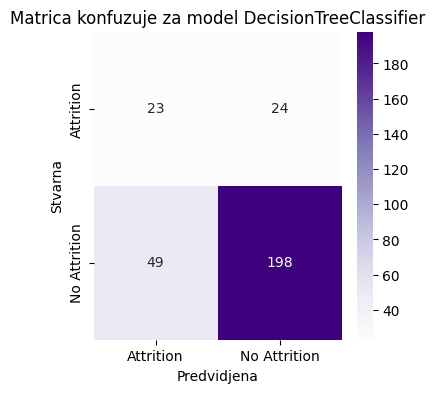

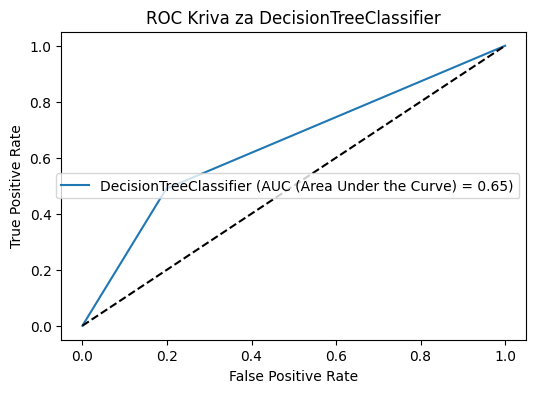

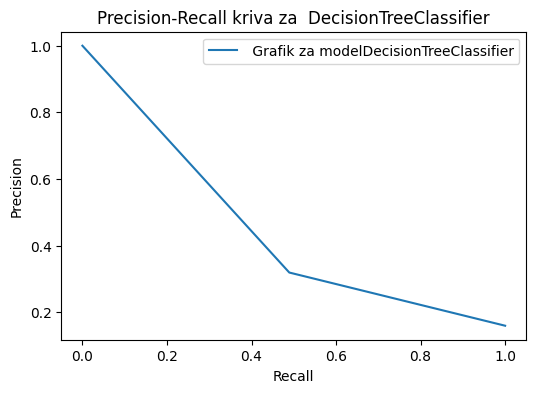

In [77]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_bal, y_train_bal)
y_pred_dt = model_dt.predict(X_test)
y_pred_prob_dt = model_dt.predict_proba(X_test)[:, 1]
prikaz_metrika("DecisionTreeClassifier", y_test, y_pred_dt, y_pred_prob_dt)

Tip algoritma/modela: Random Forest
#################################
Accuracy (Tačnost): 0.8469387755102041
#################################
Precision (Preciznost): 0.5416666666666666
#################################
Recall(odziv): 0.2765957446808511
###############################
F1 Score: 0.3661971830985916
ROC AUC: 0.7949005082263761
Confusion Matrix (matrica konfuzije):
[[236  11]
 [ 34  13]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       247
           1       0.54      0.28      0.37        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.64       294
weighted avg       0.82      0.85      0.83       294




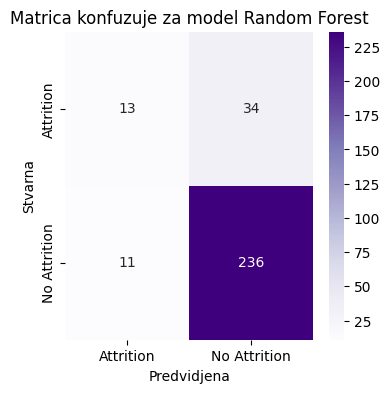

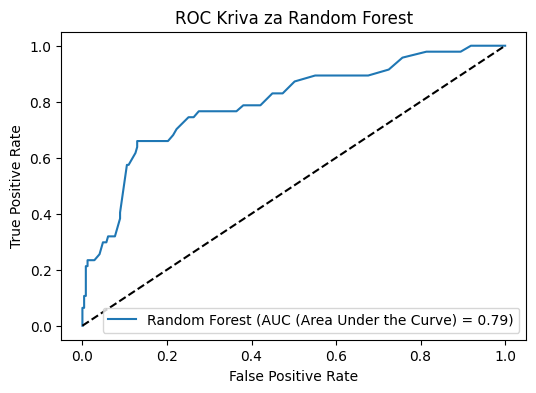

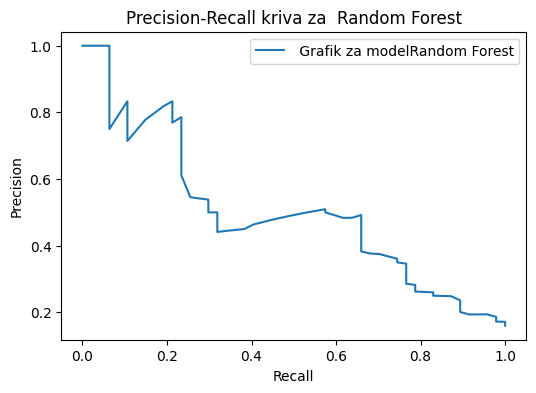

In [78]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_bal, y_train_bal)
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]
prikaz_metrika("Random Forest", y_test, y_pred_rf, y_pred_prob_rf)

Tip algoritma/modela: Gradient Boosting
#################################
Accuracy (Tačnost): 0.8469387755102041
#################################
Precision (Preciznost): 0.5277777777777778
#################################
Recall(odziv): 0.40425531914893614
###############################
F1 Score: 0.45783132530120485
ROC AUC: 0.7994659316047893
Confusion Matrix (matrica konfuzije):
[[230  17]
 [ 28  19]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       247
           1       0.53      0.40      0.46        47

    accuracy                           0.85       294
   macro avg       0.71      0.67      0.68       294
weighted avg       0.83      0.85      0.84       294




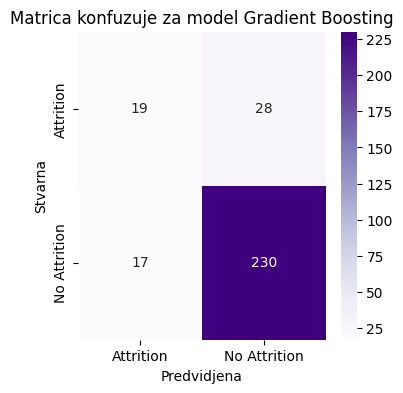

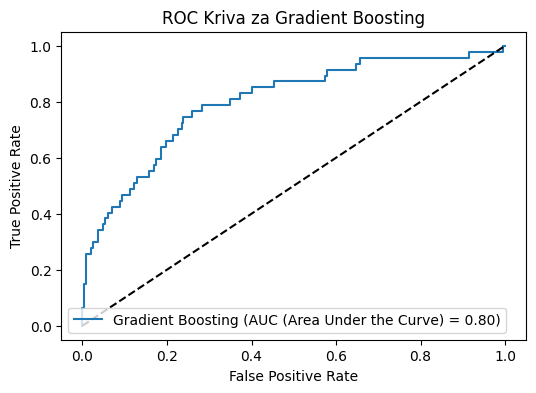

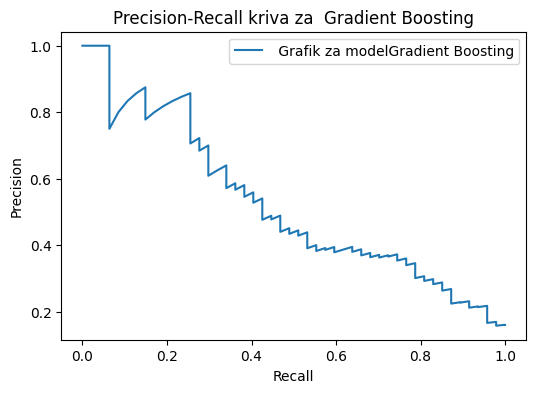

In [79]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train_bal, y_train_bal)
y_pred_gb = model_gb.predict(X_test)
y_pred_prob_gb = model_gb.predict_proba(X_test)[:, 1]
prikaz_metrika("Gradient Boosting", y_test, y_pred_gb, y_pred_prob_gb)

Tip algoritma/modela: AdaBoost
#################################
Accuracy (Tačnost): 0.8231292517006803
#################################
Precision (Preciznost): 0.4489795918367347
#################################
Recall(odziv): 0.46808510638297873
###############################
F1 Score: 0.4583333333333333
ROC AUC: 0.7865449220432423
Confusion Matrix (matrica konfuzije):
[[220  27]
 [ 25  22]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       247
           1       0.45      0.47      0.46        47

    accuracy                           0.82       294
   macro avg       0.67      0.68      0.68       294
weighted avg       0.83      0.82      0.82       294




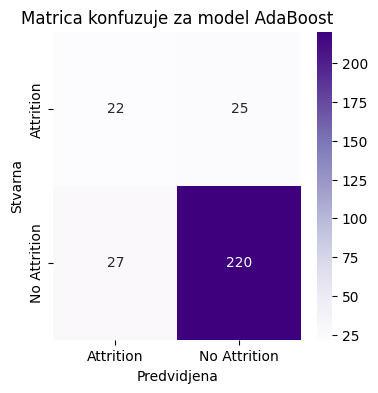

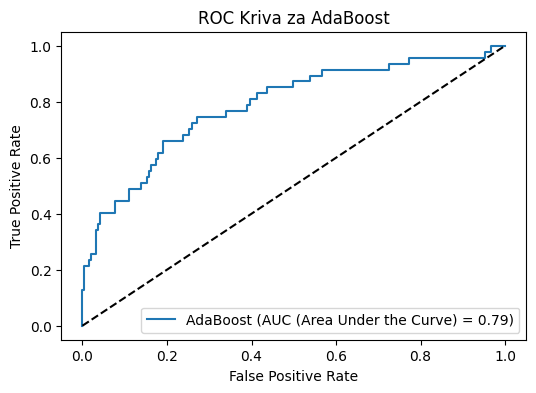

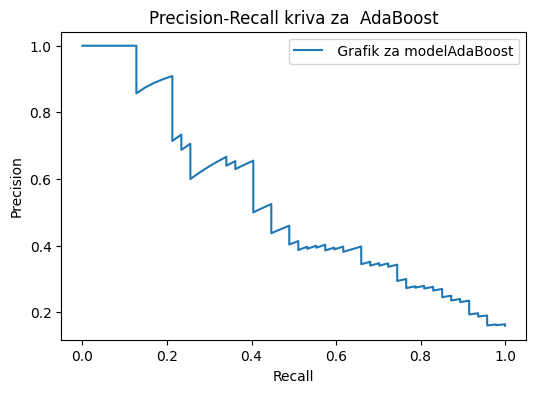

In [80]:
model_ab = AdaBoostClassifier()
model_ab.fit(X_train_bal, y_train_bal)
y_pred_ab = model_ab.predict(X_test)
y_pred_prob_ab = model_ab.predict_proba(X_test)[:, 1]
prikaz_metrika("AdaBoost", y_test, y_pred_ab, y_pred_prob_ab)

Tip algoritma/modela: Bagging
#################################
Accuracy (Tačnost): 0.826530612244898
#################################
Precision (Preciznost): 0.4375
#################################
Recall(odziv): 0.2978723404255319
###############################
F1 Score: 0.3544303797468354
ROC AUC: 0.7646222758204841
Confusion Matrix (matrica konfuzije):
[[229  18]
 [ 33  14]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       247
           1       0.44      0.30      0.35        47

    accuracy                           0.83       294
   macro avg       0.66      0.61      0.63       294
weighted avg       0.80      0.83      0.81       294




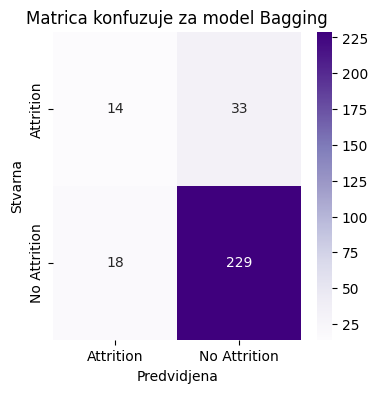

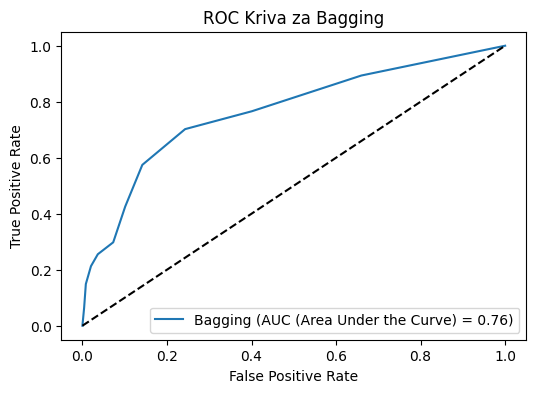

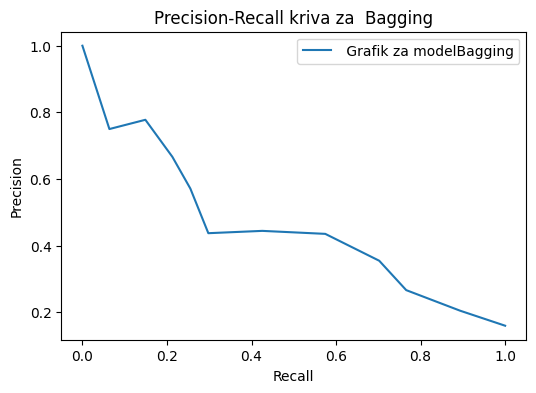

In [81]:
model_bg = BaggingClassifier()
model_bg.fit(X_train_bal, y_train_bal)
y_pred_bg = model_bg.predict(X_test)
y_pred_prob_bg = model_bg.predict_proba(X_test)[:, 1]
prikaz_metrika("Bagging", y_test, y_pred_bg, y_pred_prob_bg)

Tip algoritma/modela: XGBoost
#################################
Accuracy (Tačnost): 0.8775510204081632
#################################
Precision (Preciznost): 0.7037037037037037
#################################
Recall(odziv): 0.40425531914893614
###############################
F1 Score: 0.5135135135135135
ROC AUC: 0.7737961926091826
Confusion Matrix (matrica konfuzije):
[[239   8]
 [ 28  19]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       247
           1       0.70      0.40      0.51        47

    accuracy                           0.88       294
   macro avg       0.80      0.69      0.72       294
weighted avg       0.86      0.88      0.86       294




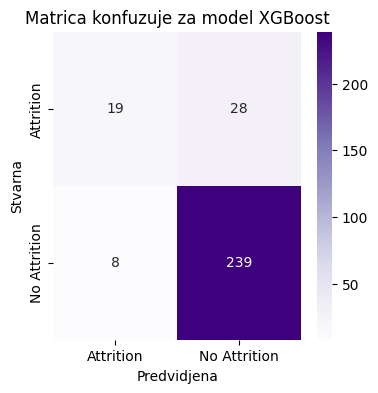

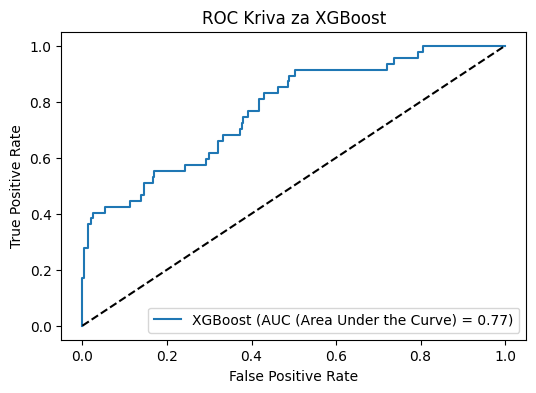

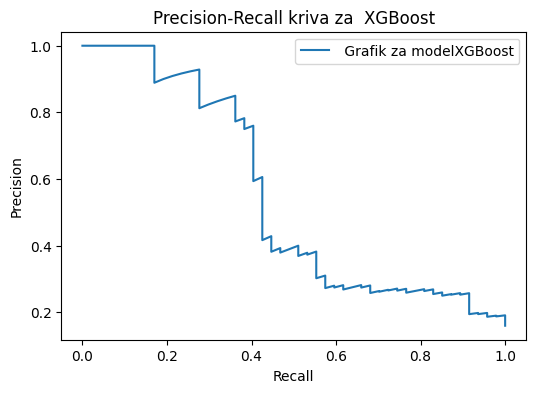

In [82]:
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_bal, y_train_bal)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
prikaz_metrika("XGBoost", y_test, y_pred_xgb, y_pred_prob_xgb)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3394
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Tip algoritma/modela: LightGBM
#################################
Accuracy (Tačnost): 0.8639455782312925
#################################
Precision (Preciznost): 0.6666666666666666
#################################
Recall(odziv): 0.2978723404255319
###############################
F1 Score: 0.4117647058823529
ROC AUC: 0.7988629511585839
Confusion Matrix (matrica konfuzije):
[[240   7]
 [ 33  14]]
Classification Report (

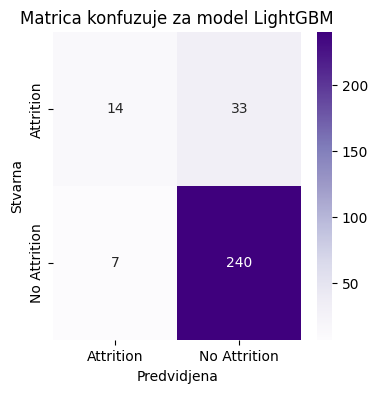

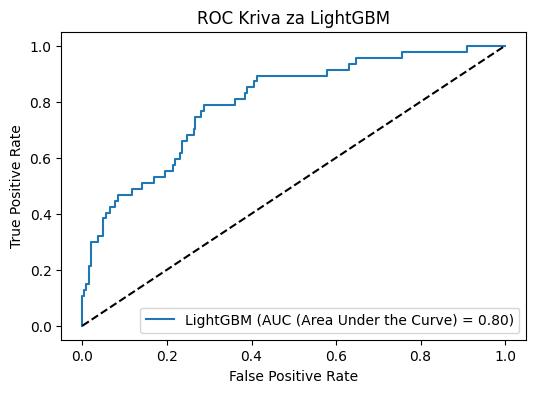

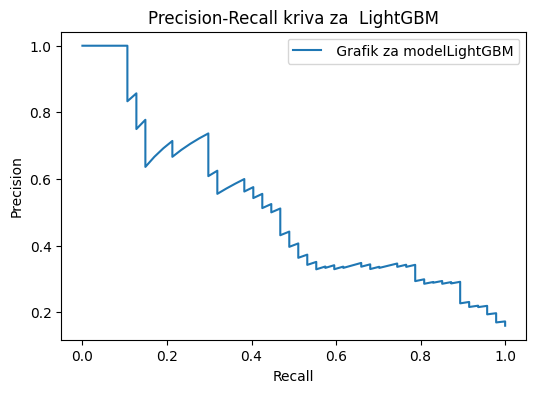

In [83]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train_bal, y_train_bal)
y_pred_lgb = model_lgb.predict(X_test)
y_pred_prob_lgb = model_lgb.predict_proba(X_test)[:, 1]
prikaz_metrika("LightGBM", y_test, y_pred_lgb, y_pred_prob_lgb)

Tip algoritma/modela: CatBoost
#################################
Accuracy (Tačnost): 0.8707482993197279
#################################
Precision (Preciznost): 0.68
#################################
Recall(odziv): 0.3617021276595745
###############################
F1 Score: 0.4722222222222222
ROC AUC: 0.8066155568955121
Confusion Matrix (matrica konfuzije):
[[239   8]
 [ 30  17]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.68      0.36      0.47        47

    accuracy                           0.87       294
   macro avg       0.78      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294




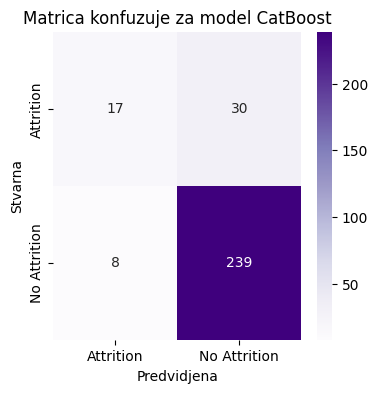

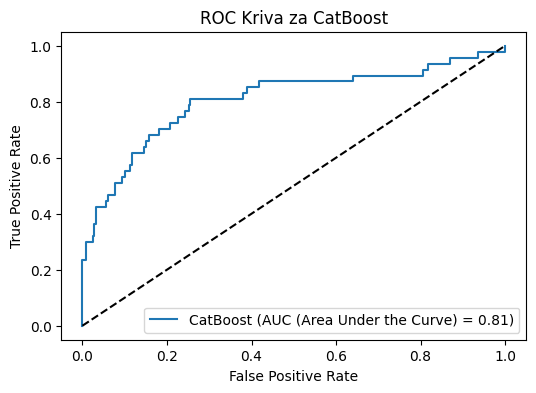

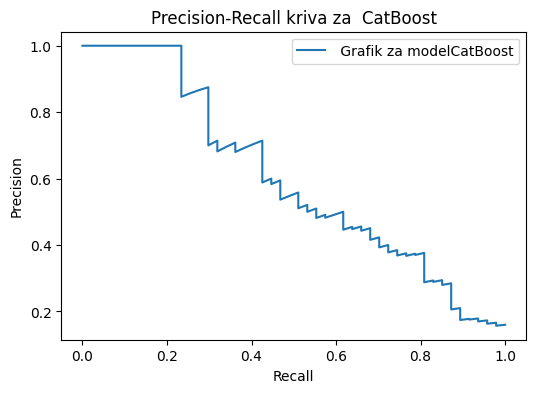

In [84]:
model_cb = cb.CatBoostClassifier(silent=True)
model_cb.fit(X_train_bal, y_train_bal)
y_pred_cb = model_cb.predict(X_test)
y_pred_prob_cb = model_cb.predict_proba(X_test)[:, 1]
prikaz_metrika("CatBoost", y_test, y_pred_cb, y_pred_prob_cb)

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 62, 127]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    }
}

In [87]:
##### sada  cemo imati jednu funkciju koja ce da radi Tuning umesto ponavljajucih linija koda kao ranije i onda se lakse gledaju rezultati

In [88]:
def treniranje_i_tjunovanje(model, param_grid, model_name):
    print(f"Treniranje {model_name} sa hiperparametrizacijom")
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train_bal, y_train_bal)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    
    prikaz_metrika(model_name + " (Sa tuningom)", y_test, y_pred, y_pred_prob)
    return grid_search.best_params_


Treniranje Logistic Regression sa hiperparametrizacijom
Tip algoritma/modela: Logistic Regression (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8435374149659864
#################################
Precision (Preciznost): 0.5106382978723404
#################################
Recall(odziv): 0.5106382978723404
###############################
F1 Score: 0.5106382978723404
ROC AUC: 0.8119562408476183
Confusion Matrix (matrica konfuzije):
[[224  23]
 [ 23  24]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.51      0.51      0.51        47

    accuracy                           0.84       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.84      0.84      0.84       294




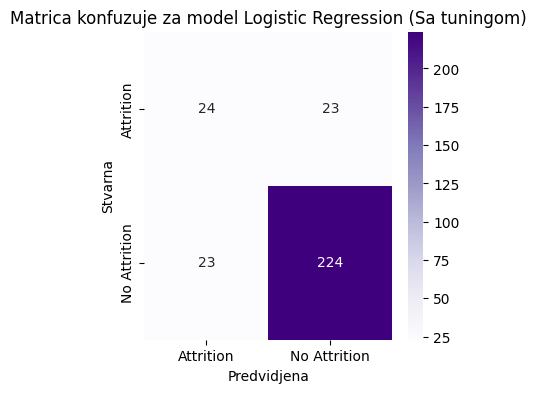

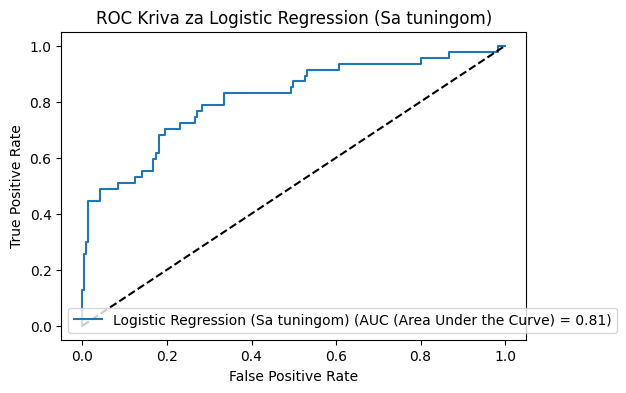

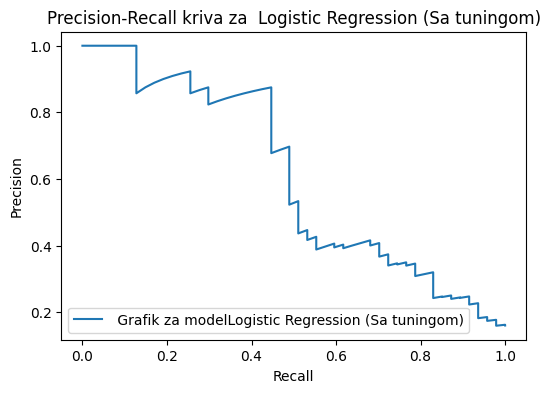

In [89]:
best_parametri_lr = treniranje_i_tjunovanje(LogisticRegression(), param_grids['Logistic Regression'], "Logistic Regression")

Treniranje Decision Tree sa hiperparametrizacijom
Tip algoritma/modela: Decision Tree (Sa tuningom)
#################################
Accuracy (Tačnost): 0.7925170068027211
#################################
Precision (Preciznost): 0.3793103448275862
#################################
Recall(odziv): 0.46808510638297873
###############################
F1 Score: 0.41904761904761906
ROC AUC: 0.617451976914463
Confusion Matrix (matrica konfuzije):
[[211  36]
 [ 25  22]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       247
           1       0.38      0.47      0.42        47

    accuracy                           0.79       294
   macro avg       0.64      0.66      0.65       294
weighted avg       0.81      0.79      0.80       294




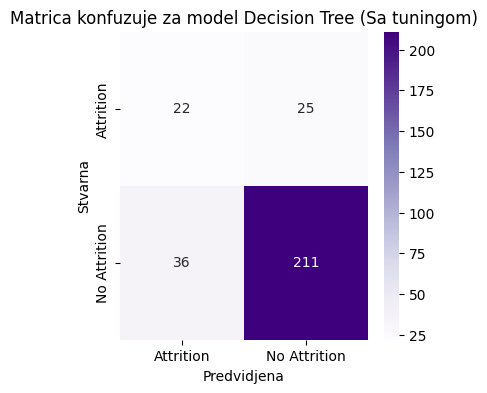

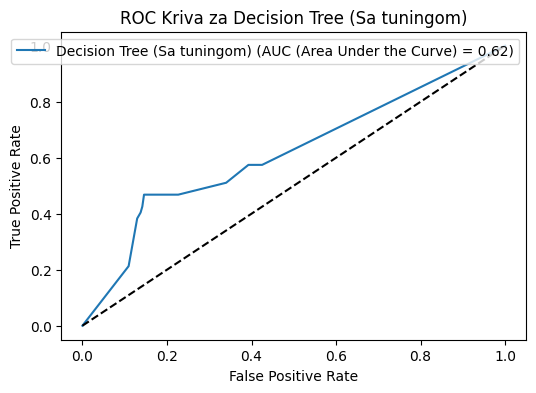

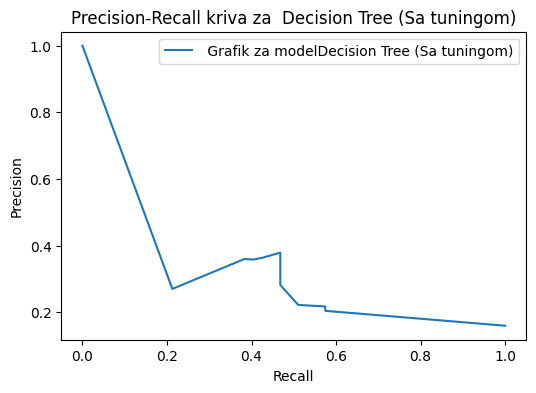

In [90]:
best_parametri_dt = treniranje_i_tjunovanje(DecisionTreeClassifier(), param_grids['Decision Tree'], "Decision Tree")

Treniranje Random Forest sa hiperparametrizacijom
Tip algoritma/modela: Random Forest (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8503401360544217
#################################
Precision (Preciznost): 0.56
#################################
Recall(odziv): 0.2978723404255319
###############################
F1 Score: 0.3888888888888889
ROC AUC: 0.8012748729434059
Confusion Matrix (matrica konfuzije):
[[236  11]
 [ 33  14]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       247
           1       0.56      0.30      0.39        47

    accuracy                           0.85       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.83      0.85      0.83       294




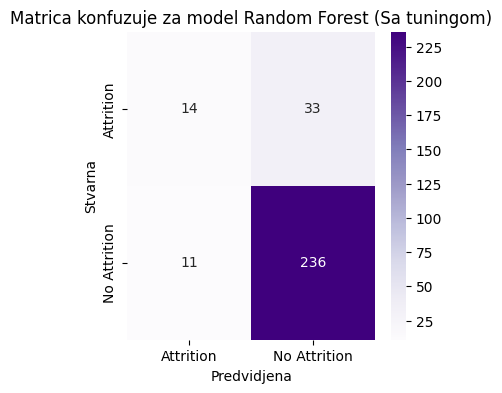

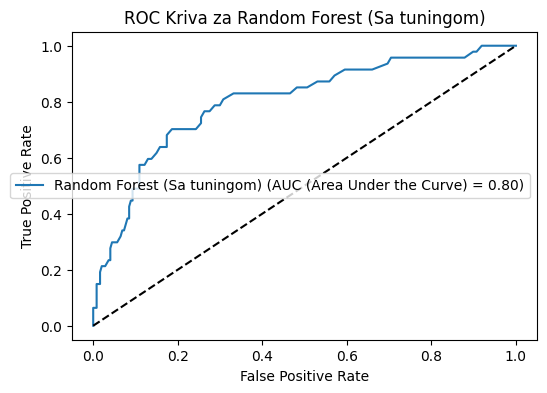

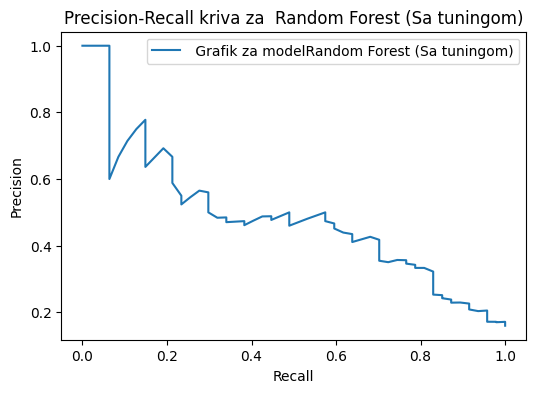

In [91]:
best_parametri_rf = treniranje_i_tjunovanje(RandomForestClassifier(), param_grids['Random Forest'], "Random Forest")

Treniranje Gradient Boosting sa hiperparametrizacijom
Tip algoritma/modela: Gradient Boosting (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8673469387755102
#################################
Precision (Preciznost): 0.7
#################################
Recall(odziv): 0.2978723404255319
###############################
F1 Score: 0.417910447761194
ROC AUC: 0.7870617624257041
Confusion Matrix (matrica konfuzije):
[[241   6]
 [ 33  14]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.70      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.79      0.64      0.67       294
weighted avg       0.85      0.87      0.84       294




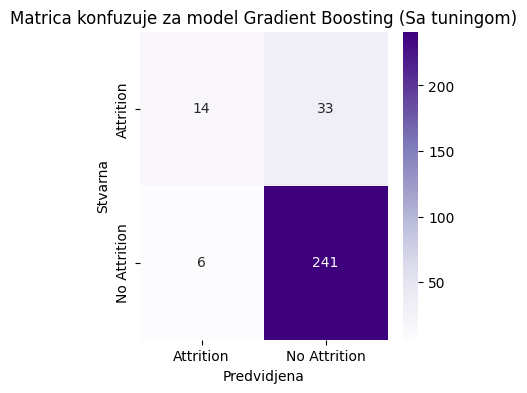

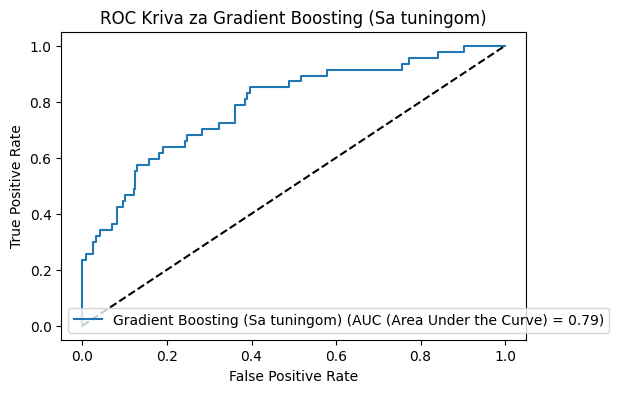

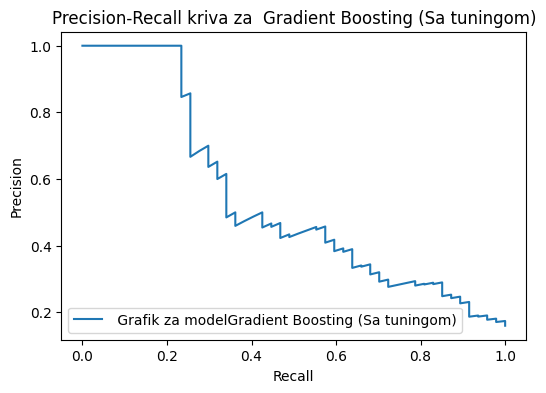

In [92]:
best_parametri_gb = treniranje_i_tjunovanje(GradientBoostingClassifier(), param_grids['Gradient Boosting'], "Gradient Boosting")

Treniranje AdaBoost sa hiperparametrizacijom
Tip algoritma/modela: AdaBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8197278911564626
#################################
Precision (Preciznost): 0.4423076923076923
#################################
Recall(odziv): 0.48936170212765956
###############################
F1 Score: 0.46464646464646464
ROC AUC: 0.8019639934533551
Confusion Matrix (matrica konfuzije):
[[218  29]
 [ 24  23]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       247
           1       0.44      0.49      0.46        47

    accuracy                           0.82       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.83      0.82      0.82       294




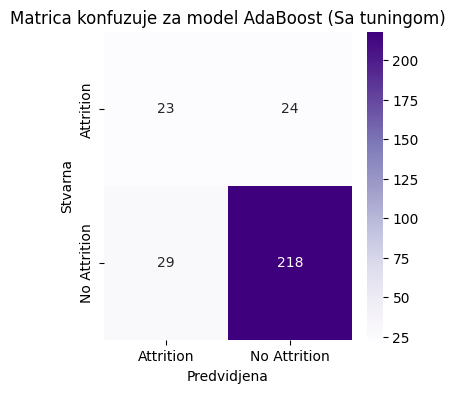

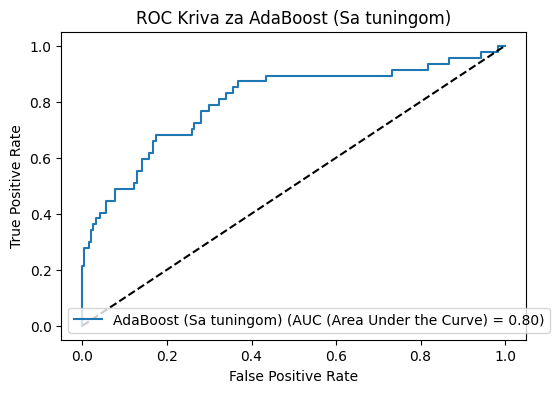

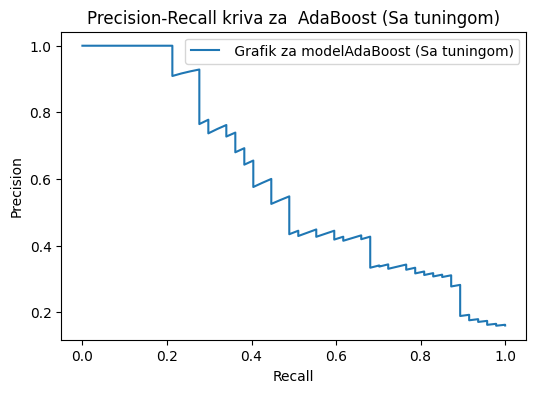

In [93]:
best_parametri_ab = treniranje_i_tjunovanje(AdaBoostClassifier(), param_grids['AdaBoost'], "AdaBoost")

Treniranje AdaBoost sa hiperparametrizacijom
Tip algoritma/modela: AdaBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8197278911564626
#################################
Precision (Preciznost): 0.4423076923076923
#################################
Recall(odziv): 0.48936170212765956
###############################
F1 Score: 0.46464646464646464
ROC AUC: 0.8019639934533551
Confusion Matrix (matrica konfuzije):
[[218  29]
 [ 24  23]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       247
           1       0.44      0.49      0.46        47

    accuracy                           0.82       294
   macro avg       0.67      0.69      0.68       294
weighted avg       0.83      0.82      0.82       294




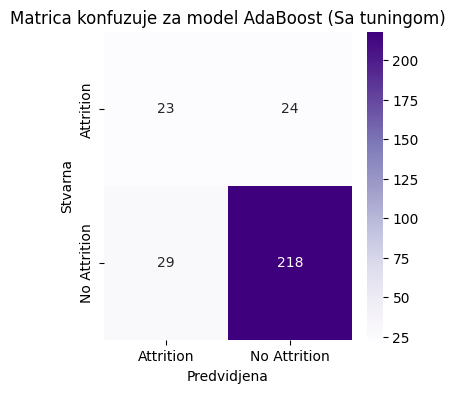

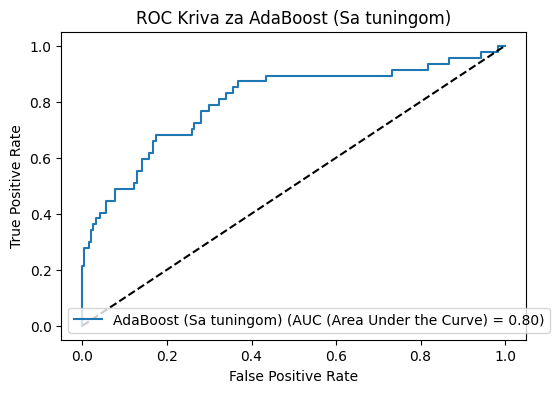

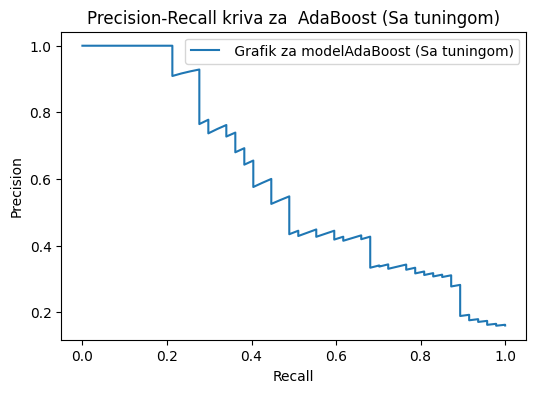

In [94]:
best_parametri_ab = treniranje_i_tjunovanje(AdaBoostClassifier(), param_grids['AdaBoost'], "AdaBoost")

Treniranje Bagging sa hiperparametrizacijom
Tip algoritma/modela: Bagging (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8469387755102041
#################################
Precision (Preciznost): 0.5357142857142857
#################################
Recall(odziv): 0.3191489361702128
###############################
F1 Score: 0.4
ROC AUC: 0.7729347919717461
Confusion Matrix (matrica konfuzije):
[[234  13]
 [ 32  15]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.32      0.40        47

    accuracy                           0.85       294
   macro avg       0.71      0.63      0.66       294
weighted avg       0.82      0.85      0.83       294




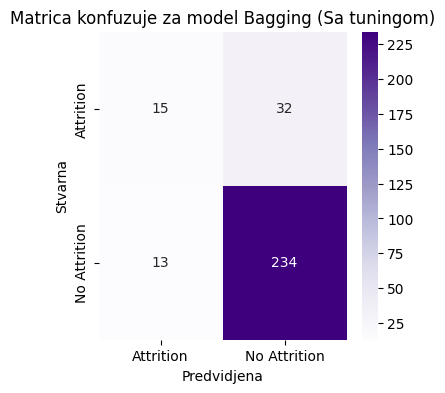

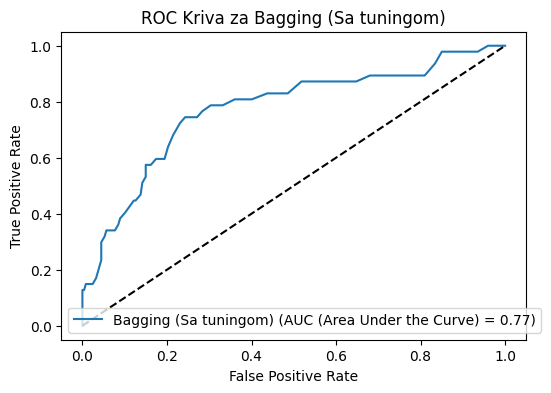

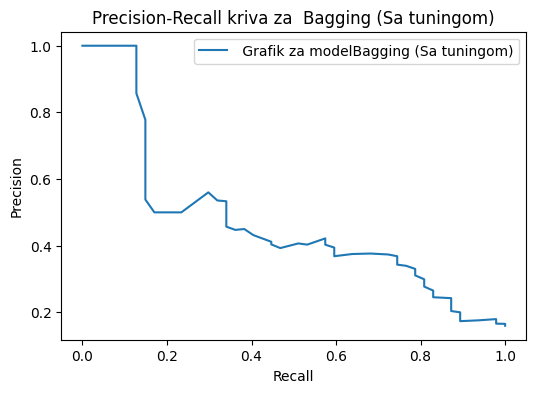

In [95]:
best_parametri_bg = treniranje_i_tjunovanje(BaggingClassifier(), param_grids['Bagging'], "Bagging")

Treniranje XGBoost sa hiperparametrizacijom
Tip algoritma/modela: XGBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8707482993197279
#################################
Precision (Preciznost): 0.6666666666666666
#################################
Recall(odziv): 0.3829787234042553
###############################
F1 Score: 0.48648648648648646
ROC AUC: 0.7879231630631406
Confusion Matrix (matrica konfuzije):
[[238   9]
 [ 29  18]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.67      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.78      0.67      0.71       294
weighted avg       0.86      0.87      0.86       294




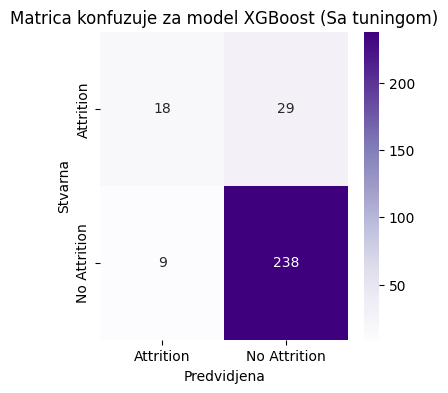

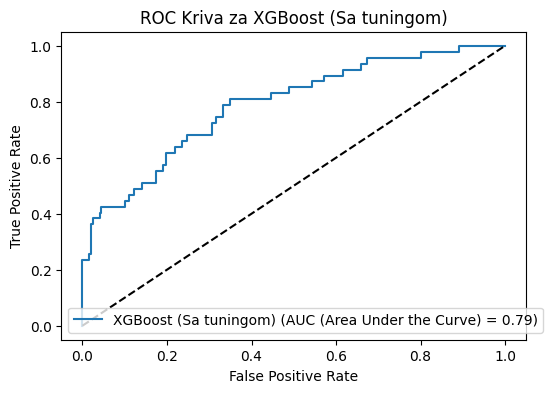

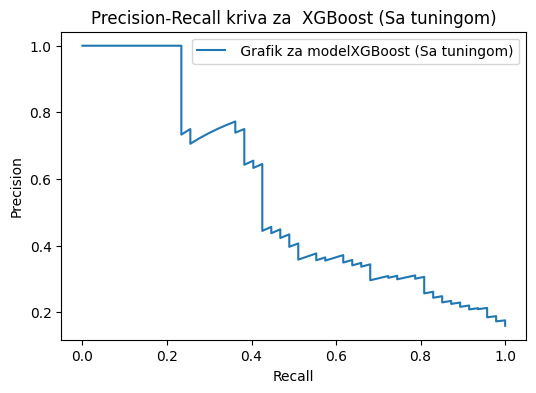

In [96]:
best_parametri_xgb = treniranje_i_tjunovanje(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grids['XGBoost'], "XGBoost")

Treniranje LightGBM sa hiperparametrizacijom
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 657, number of negative: 657
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3381
[LightGBM] [Info] Number of data points in the train set: 1314, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 658, number of negative: 657
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3231
[LightGBM] [Info] Number of data p

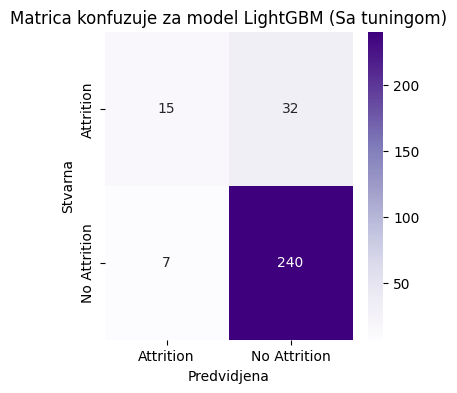

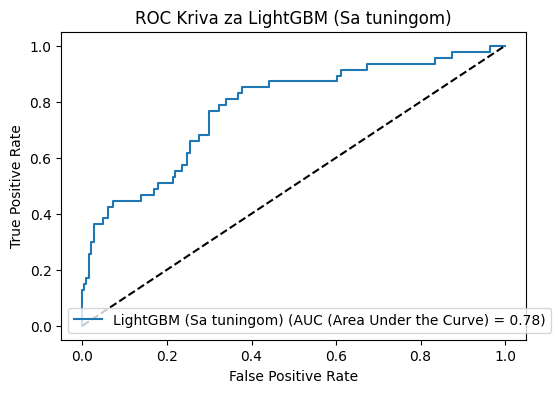

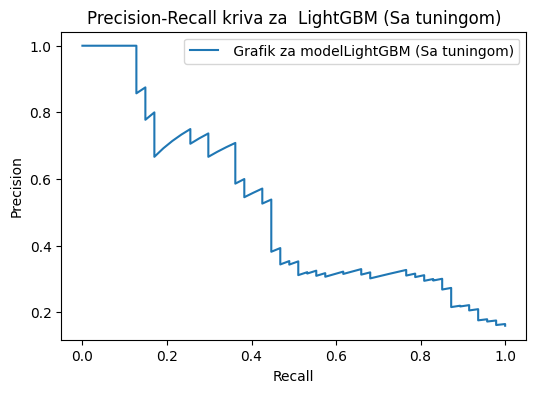

In [97]:
best_parametri_lgb = treniranje_i_tjunovanje(lgb.LGBMClassifier(), param_grids['LightGBM'], "LightGBM")

Treniranje CatBoost sa hiperparametrizacijom
Tip algoritma/modela: CatBoost (Sa tuningom)
#################################
Accuracy (Tačnost): 0.8707482993197279
#################################
Precision (Preciznost): 0.6956521739130435
#################################
Recall(odziv): 0.3404255319148936
###############################
F1 Score: 0.4571428571428571
ROC AUC: 0.7981738306486347
Confusion Matrix (matrica konfuzije):
[[240   7]
 [ 31  16]]
Classification Report (klasifikacijski izvestaj):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.70      0.34      0.46        47

    accuracy                           0.87       294
   macro avg       0.79      0.66      0.69       294
weighted avg       0.86      0.87      0.85       294




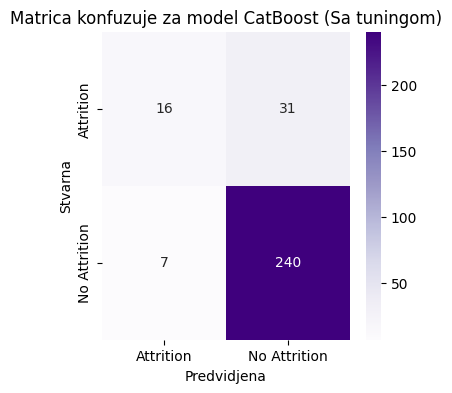

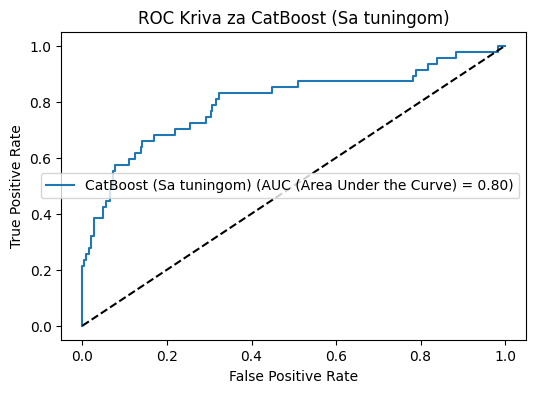

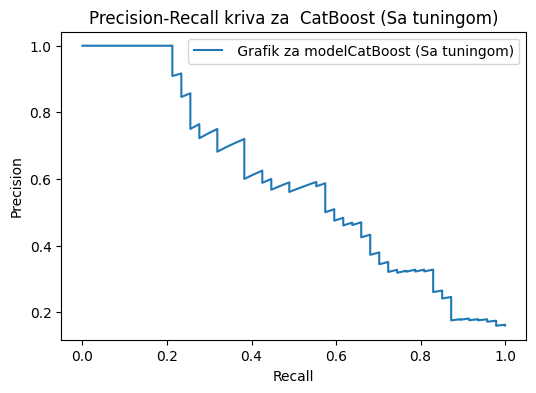

In [98]:
best_parametri_cb = treniranje_i_tjunovanje(cb.CatBoostClassifier(silent=True), param_grids['CatBoost'], "CatBoost")


In [ ]:
best_parametri_cb = treniranje_i_tjunovanje(cb.CatBoostClassifier(silent=True), param_grids['CatBoost'], "CatBoost")

Treniranje CatBoost sa hiperparametrizacijom
